<a href="https://colab.research.google.com/github/mbaguesgalvez/marinabagues.github.io/blob/main/CMPS%203160-Coffee_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coffee Quality and Sensory Attributes
By Marina Bagues Galvez

CMPS 3160

Webpage:https://mbaguesgalvez.github.io/marinabagues.github.io/

Github Repository: https://github.com/mbaguesgalvez/marinabagues.github.io


# Project Overview
This project explores how the sensory attributes of coffee (like aroma, acidity, body, or flavor) influence its quality score.

By using data from the Coffee Quality Institute (CQI), we can see if certain characteristics (such as acidity or sweetness) are better indicators of a high-quality coffee. This project will allow comparision between two types of coffee: **Arabica** and **Robusta**, to check if they share similar quality patterns.

The final goal is to understand what makes a coffee “good” and see whether different species are valued differently based on their sensory profile.


# Background & Motivation for this Project
Coffee is one of the most popular drinks in the world, and its quality can change a lot depending on the type of bean, where it’s grown, and how it’s processed.
The Coffee Quality Institute (CQI) collects data from trained coffee tasters who rate each sample based on different sensory attributes like aroma, acidity, and body. All these scores are then combined into one final number called Total Cup Points, which represents the overall quality of the coffee.

Since I drink coffee almost every day, I thought it would be fun to actually study it and see what makes one cup better than another. It’s something that feels part of my daily routine, but I had never really thought about what defines a “good” coffee from a professional perspective.


# Research Questions



1.   For Arabica coffee, which sensory attributes (like aroma, flavor, acidity, or body) have the strongest relationship with the final quality score, known as Total Cup Points?
2.   When comparing Arabica and Robusta coffees, can we predict whether a coffee will be high quality using only sensory data?



# Initial ETL (Extract, Tidy, Load)

**Data Sources**

For this project, I used two public datasets that come from the Coffee Quality Institute (CQI).

They were collected from the official CQI database and later cleaned by users on GitHub and Kaggle.
Both datasets include information from trained coffee tasters who evalaute the sensory quality of different coffee samples. This, helps explore how the tasting attributes are connected to the overall quality of the coffee, and see if these patterns change between Arabica and Robusta beans.


*   **Arabica dataset:** This file includes 1,311 Arabica coffee samples with variables such as country of origin, processing method, and sensory scores (aroma, flavor, aftertaste, acidity, body, balance, etc.), plus the final Total Cup Points that represent the coffee’s overall quality. It comes from the public GitHub repository created by jldbc
, which is based on official CQI data.
"C:\Users\marin\OneDrive\Documentos\TULANE 2025-2026\FALL SEMESTER\CMPS 3160-01 Intro to Data Science\final pjt\arabica_data_cleaned.csv" (https://github.com/jldbc/coffee-quality-database/blob/master/data/arabica_data_cleaned.csv)

*  **Robusta dataset**: This dataset comes from the same CQI source but focuses on Robusta coffee beans. It has the same structure as the Arabica file, which makes it easy to compare the two species directly in the analysis.
https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi

# Imports and Loading the Data



In [1]:
!git clone https://github.com/mbaguesgalvez/marinabagues.github.io
%cd marinabagues.github.io

Cloning into 'marinabagues.github.io'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 95 (delta 52), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (95/95), 800.69 KiB | 8.43 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/marinabagues.github.io


In [2]:
#Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Load both datasets

df_arabica = pd.read_csv('arabica_data_cleaned.csv', sep=',' )
df_robusta = pd.read_csv('robusta_data_cleaned.csv', sep= ',')

# Add coffee type identifiers
df_arabica['species'] = 'Arabica'
df_robusta['species'] = 'Robusta'

# Combine both datasets into a single DataFrame
df = pd.concat([df_arabica, df_robusta], ignore_index=True)

# Add a unique ID for each sample
df['sample_id'] = df.index

# Basic dataset info
print(f'Total Number of Arabica Samples: {len(df_arabica)}')
print(f'Total Number of Robusta Samples: {len(df_robusta)}')
print(f'Total Number of Samples: {len(df)}')

df.head()

Total Number of Arabica Samples: 1311
Total Number of Robusta Samples: 28
Total Number of Samples: 1339


,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,altitude_low_meters,altitude_high_meters,altitude_mean_meters,species,Fragrance...Aroma,Salt...Acid,Bitter...Sweet,Mouthfeel,Uniform.Cup,sample_id
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,1950.0,2200.0,2075.0,Arabica,NaN,NaN,NaN,NaN,NaN,0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,1950.0,2200.0,2075.0,Arabica,NaN,NaN,NaN,NaN,NaN,1
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,1600.0,1800.0,1700.0,Arabica,NaN,NaN,NaN,NaN,NaN,2
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,1800.0,2200.0,2000.0,Arabica,NaN,NaN,NaN,NaN,NaN,3
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,1950.0,2200.0,2075.0,Arabica,NaN,NaN,NaN,NaN,NaN,4


**Dataset Overview**

The combined dataset contains information about coffee samples evaluated by professional tasters.
Each record includes the country of origin, processing method, and sensory attributes such as aroma, flavor, aftertaste, acidity, body, balance, and the final Total Cup Points, which represent the coffee’s overall quality score.

Here’s a summary of the key variables:

Country.of.Origin – Nominal: where the coffee was produced

Processing.Method – Nominal: washed, natural, honey, etc.

Aroma – Interval: aroma intensity rated 0–10

Flavor – Interval: taste perception, 0–10

Aftertaste – Interval: taste persistence, 0–10

Acidity – Interval: perceived brightness/acidity, 0–10

Body – Interval: mouthfeel or weight, 0–10

Balance – Interval: overall harmony of flavors, 0–10

Uniformity, Clean.Cup, Sweetness – Binary-like scales (mostly 10 or 0 if defect detected)

Total.Cup.Points – Ratio: final quality score (0–100)

species – Nominal: identifies whether the sample is Arabica or Robusta

sample_id – Nominal: unique identifier

**Basic Statistics**

In [3]:
# Basic descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1339.0,642.586258,385.707857,1.00,307.50,642.00,976.50,1312.00
Number.of.Bags,1339.0,154.182972,129.987162,0.00,14.00,175.00,275.00,1062.00
Aroma,1311.0,7.563806,0.378666,0.00,7.42,7.58,7.75,8.75
Flavor,1339.0,7.520426,0.398442,0.00,7.33,7.58,7.75,8.83
Aftertaste,1339.0,7.401083,0.404463,0.00,7.25,7.42,7.58,8.67
Acidity,1311.0,7.533112,0.381599,0.00,7.33,7.50,7.75,8.75
Body,1311.0,7.517727,0.359213,0.00,7.33,7.50,7.67,8.58
Balance,1339.0,7.518013,0.408943,0.00,7.33,7.50,7.75,8.75
Uniformity,1311.0,9.833394,0.559343,0.00,10.00,10.00,10.00,10.00
Clean.Cup,1339.0,9.835108,0.763946,0.00,10.00,10.00,10.00,10.00


From this summary, we can already see that Arabica samples tend to have higher average Total Cup Points than Robusta, as expected. However, both show interesting variations depending on the sensory attributes.

**Data Distribution by Species**

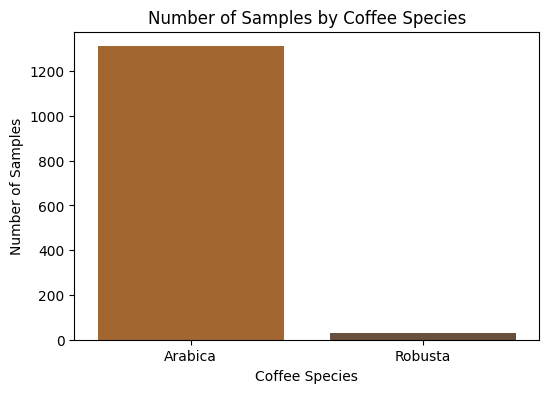

In [4]:
# Count samples by coffee species
coffee_count = df['species'].value_counts().reset_index()
coffee_count.columns = ['species', 'count']

# Bar chart
plt.figure(figsize=(6,4))
sns.barplot(data=coffee_count, x='species', y='count', hue='species',
            palette=['#b5651d','#6f4e37'], legend=False)
plt.title('Number of Samples by Coffee Species')
plt.xlabel('Coffee Species')
plt.ylabel('Number of Samples')
plt.show()

The dataset includes a larger number of Arabica samples compared to Robusta, which reflects the broader representation of Arabica coffees in the CQI database.

**Sensory Attribute Correlations**

Now, let’s explore the relationships between sensory attributes and the final quality score (Total Cup Points) for each coffee type.

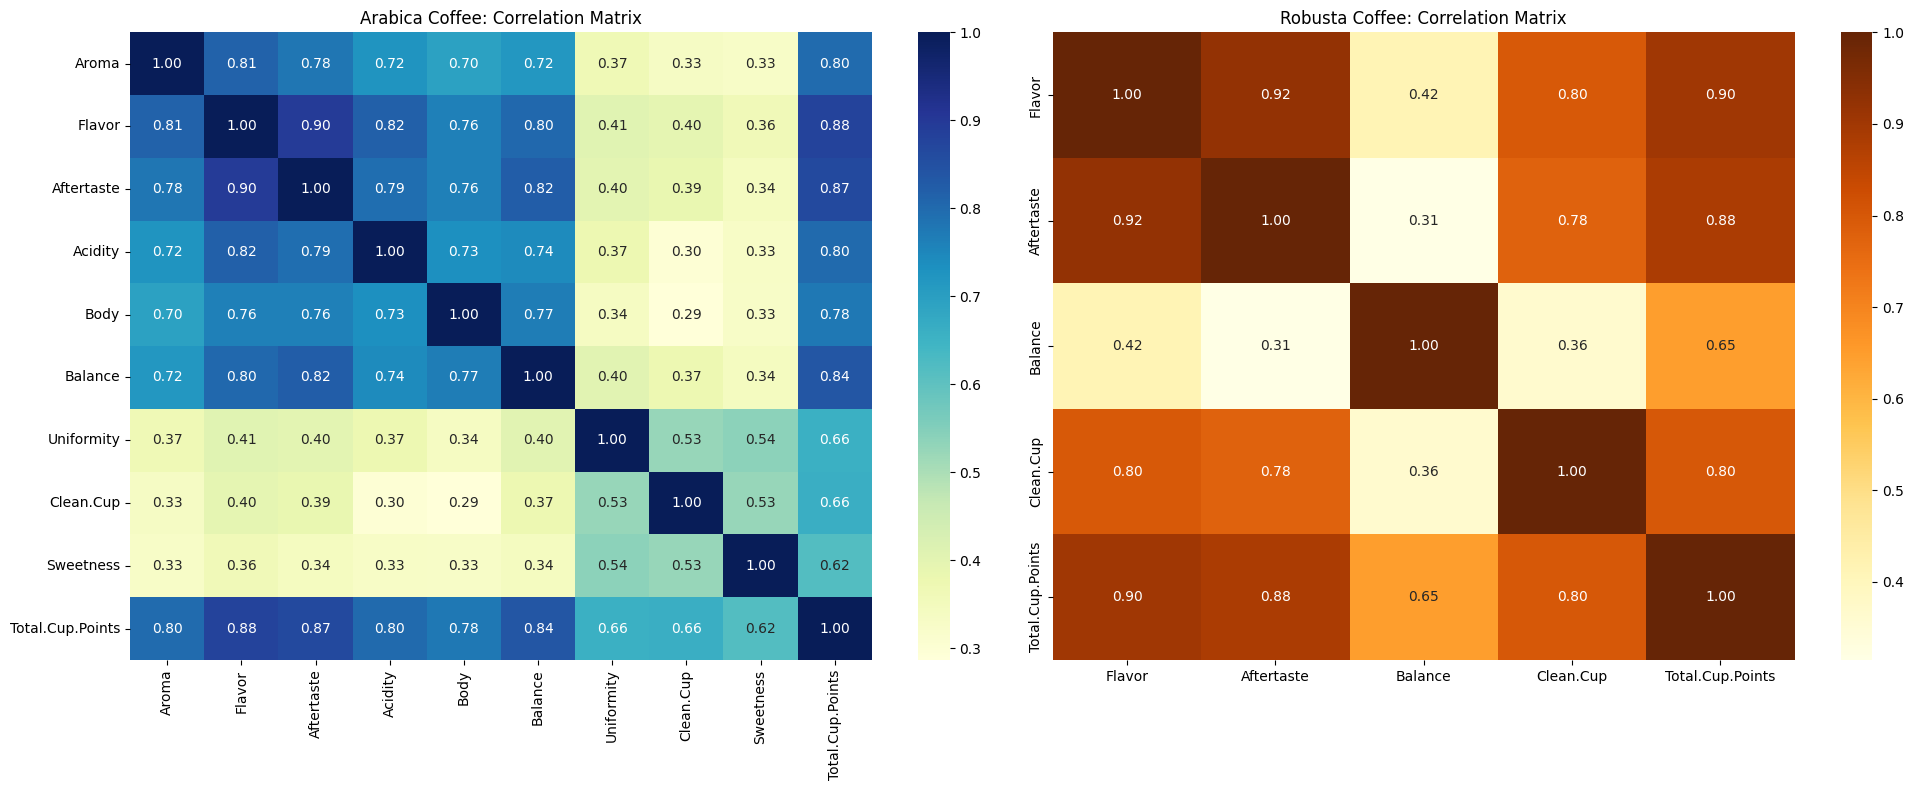

In [5]:
# Select relevant sensory attributes that are present in both dataframes
sensory_vars_arabica = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Total.Cup.Points']
sensory_vars_robusta = [col for col in sensory_vars_arabica if col in df_robusta.columns]

# Separate correlation matrices
arabica_corr = df_arabica[sensory_vars_arabica].corr()
robusta_corr = df_robusta[sensory_vars_robusta].corr()

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(arabica_corr, annot=True, cmap='YlGnBu', fmt='.2f', ax=axes[0])
axes[0].set_title('Arabica Coffee: Correlation Matrix')

sns.heatmap(robusta_corr, annot=True, cmap='YlOrBr', fmt='.2f', ax=axes[1])
axes[1].set_title('Robusta Coffee: Correlation Matrix')

plt.tight_layout()
plt.show()

**Correlation Insights**


From the correlation heatmaps, we can draw the following observations:

*   For Arabica coffees, the highest correlations with Total Cup Points are usually Aroma, Flavor, Aftertaste, and Balance.
These attributes tend to capture the complexity and harmony of high-quality Arabica beans.
*  For Robusta coffees, while flavor and aroma remain important, Body and Aftertaste often show a stronger correlation with overall quality.
This aligns with Robusta’s heavier and earthier sensory profile.

* In both species, Uniformity, Clean Cup, and Sweetness also correlate strongly because they penalize defects and reward consistency.

**Visualizing Attribute Trends**

To visualize how specific sensory attributes influence quality, we can plot the average value of each attribute across quality levels.

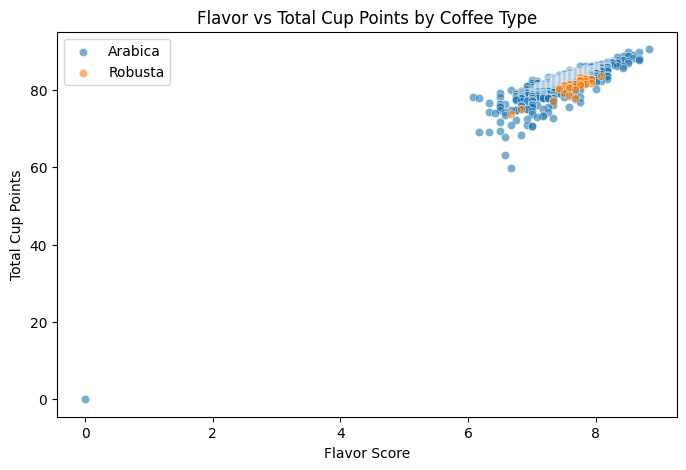

In [6]:
# Average sensory scores by quality level
arabica_quality = df_arabica.groupby('Total.Cup.Points')[['Aroma','Flavor','Body','Balance']].mean().reset_index()
robusta_quality = df_robusta.groupby('Total.Cup.Points')[['Flavor','Aftertaste','Balance']].mean().reset_index()

# Example: Flavor vs Quality
plt.figure(figsize=(8,5))
sns.scatterplot(x='Flavor', y='Total.Cup.Points', data=df_arabica, label='Arabica', alpha=0.6)
sns.scatterplot(x='Flavor', y='Total.Cup.Points', data=df_robusta, label='Robusta', alpha=0.6)
plt.title('Flavor vs Total Cup Points by Coffee Type')
plt.xlabel('Flavor Score')
plt.ylabel('Total Cup Points')
plt.legend()
plt.show()

* Arabica samples usually score higher on aroma, flavor, and balance, showing smoother and more complex sensory characteristics.

* Robusta samples tend to have higher body but lower overall cup scores, indicating stronger but less refined flavor profiles.

* These initial patterns will guide further analysis in later milestones, where regression or feature importance methods (like correlation ranking or linear modeling) can quantify which factors most determine coffee quality for each species.



# EDA- Summary Statistics and more Visuals

**Summary Statistics**

Let's look at the details:

In [7]:
import numpy as np

print("Total Cup Points: overall")
print(df["Total.Cup.Points"].describe()[["count","mean","std","min","25%","50%","75%","max"]], "\n")

print("Total Cup Points by species")
print(df.groupby("species")["Total.Cup.Points"].describe()[["count","mean","std","min","50%","max"]], "\n")

# average of sensory attributes by species (just to see differences)
sensory_cols = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Total.Cup.Points']
num_cols = [c for c in sensory_cols if c in df.columns]
print("=== Mean sensory scores by species ===")
print(df.groupby("species")[num_cols].mean().round(2).T.head(10))  # first 10 to keep it short

Total Cup Points: overall
count    1339.000000
mean       82.089851
std         3.500575
min         0.000000
25%        81.080000
50%        82.500000
75%        83.670000
max        90.580000
Name: Total.Cup.Points, dtype: float64 

Total Cup Points by species
          count       mean       std    min   50%    max
species                                                 
Arabica  1311.0  82.115927  3.515761   0.00  82.5  90.58
Robusta    28.0  80.868929  2.441233  73.75  81.5  83.75 

=== Mean sensory scores by species ===
species           Arabica  Robusta
Aroma                7.56      NaN
Flavor               7.52     7.63
Aftertaste           7.40     7.56
Acidity              7.53      NaN
Body                 7.52      NaN
Balance              7.52     7.54
Uniformity           9.83      NaN
Clean.Cup            9.83     9.93
Sweetness            9.90      NaN
Total.Cup.Points    82.12    80.87


These summary statistics give a general idea of the quality scores in the dataset.

Overall, the average Total Cup Points is around 82, with most samples scoring between 81 and 84. The maximum score reaches a little above 90, showing that there are a few exceptional coffees.

When separating by species, Arabica has a slightly higher mean (≈82.1) compared to Robusta (≈80.9), which matches the common expectation that Arabica coffees are usually rated better in quality. The Robusta samples also show a smaller standard deviation, probably because there are fewer of them in the dataset (only 28).

Looking at the sensory attributes, both types show similar average scores in categories such as Flavor, Aftertaste, and Balance, while some variables for Robusta are missing. Attributes like Uniformity, Clean Cup, and Sweetness have very high and stable values, suggesting that most coffees perform well in those categories and that they don’t vary much across samples.

This table confirms that Arabica tends to reach slightly higher quality scores and that the sensory dimensions most related to cup quality are flavor, acidity, and balance.

**More Coffee Data Analysis Through Visuals:**

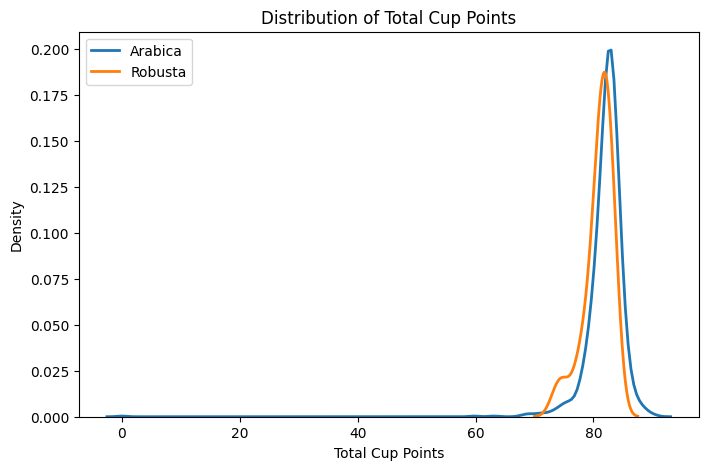

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
for t in ["Arabica","Robusta"]:
    tmp = df[df["species"]==t]["Total.Cup.Points"].dropna()
    sns.kdeplot(tmp, label=t, linewidth=2)
plt.title("Distribution of Total Cup Points")
plt.xlabel("Total Cup Points")
plt.ylabel("Density")
plt.legend()
plt.show()

In this graph, which demostrates the distribution of the Total Cup Points for both Arabica and Robusta coffees, I can see that both types have very similar shapes, but Arabica is slightly shifted to the right, meaning it usually scores a bit higher on average. Most samples are between 80 and 86 points, which are considered good or very good quality coffees.

The Robusta curve appears a bit lower and wider, showing more variation and slightly lower scores overall.

This confirms that Arabica tends to be rated higher in quality, while Robusta is often used for blends or instant coffee.

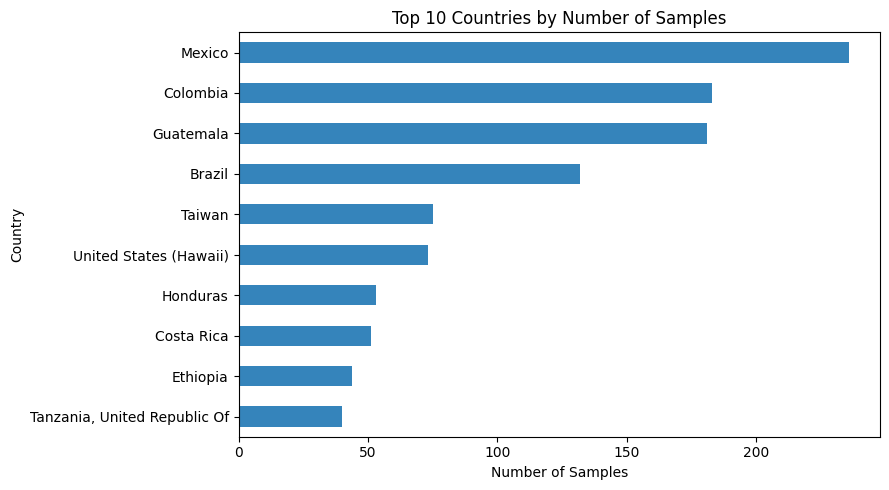

In [9]:
top_countries = (df["Country.of.Origin"]
                 .dropna()
                 .value_counts()
                 .head(10))

plt.figure(figsize=(9,5))
top_countries.sort_values().plot(kind="barh", alpha=0.9)
plt.title("Top 10 Countries by Number of Samples")
plt.xlabel("Number of Samples")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

This chart shows the top ten countries with the highest number of coffee samples in the dataset.

I can see that Mexico, Colombia, and Guatemala have the most samples, which suggests that these countries are very active in coffee production and quality evaluation. The dataset is clearly dominated by Latin American countries, which could influence the analysis since their growing conditions and cupping styles might be similar.

Other important producers like Brazil, Taiwan, and Honduras also appear, but with fewer records.

It’s interesting that the United States (Hawaii) shows up as well, meaning that even though it’s not usually known for coffee exports, it has recognized quality evaluations.



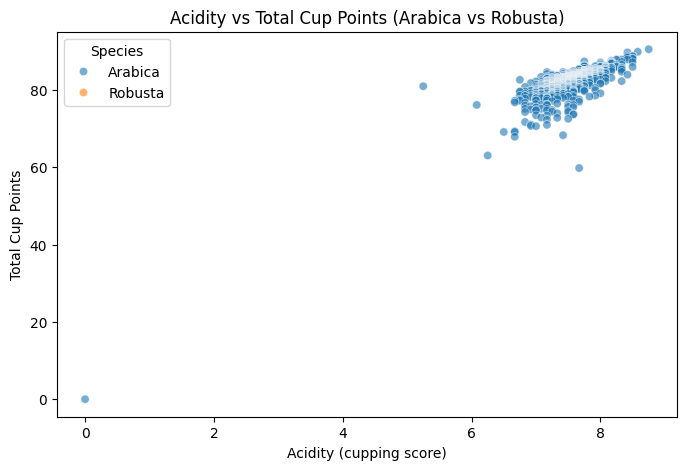

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df, x="Acidity", y="Total.Cup.Points",
    hue="species", alpha=0.6
)
plt.title("Acidity vs Total Cup Points (Arabica vs Robusta)")
plt.xlabel("Acidity (cupping score)")
plt.ylabel("Total Cup Points")
plt.legend(title="Species")
plt.show()

In [11]:
print(df["species"].unique())
print(df["species"].value_counts())

['Arabica' 'Robusta']
species
Arabica    1311
Robusta      28
Name: count, dtype: int64


This scatter plot shows the relationship between Acidity and Total Cup Points for both Arabica and Robusta coffees.

I can see a clear positive trend, especially for Arabica beans: when the acidity score increases, the overall quality score also tends to rise. This suggests that tasters often associate higher acidity with better flavor quality and supports the idea that acidity is one of the main factors that influence the total quaility of coffee.

In this case, I was confused at first because I couldn’t see the Robusta data. Then I checked for the orange dots and realized that they were actually hidden underneath the Arabica points at the end.They are harder to see because there are fewer samples, but they seem to follow a similar pattern, just with slightly lower scores overall.

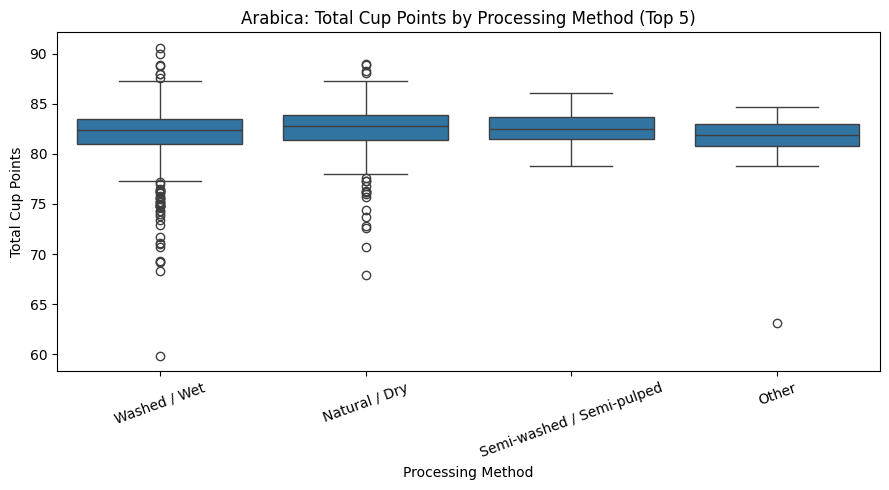

In [12]:
arab_only = df[df["species"]=="Arabica"].copy()
top_methods = (arab_only["Processing.Method"]
               .fillna("Unknown")
               .value_counts()
               .head(5)).index

plt.figure(figsize=(9,5))
sns.boxplot(
    data=arab_only[arab_only["Processing.Method"].isin(top_methods)],
    x="Processing.Method", y="Total.Cup.Points"
)
plt.title("Arabica: Total Cup Points by Processing Method (Top 5)")
plt.xlabel("Processing Method")
plt.ylabel("Total Cup Points")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

This boxplot shows how the processing method affects the Total Cup Points for Arabica coffees.

The results are quite close across all methods, but Washed/Wet and Natural/Dry coffees have slightly higher medians compared to the others. This suggests that these two methods might produce better or more consistent quality in Arabica beans.

The Washed/Wet method also has more variation, meaning it can produce both very high- and lower-quality coffees depending on how it’s done.

The Other and Semi-washed/Semi-pulped categories show fewer samples and a few low outliers, which could explain why their boxes look smaller or less stable.

This type of graph suggests that processing style has some influence on the final cup quality, but the differences are not extreme; most Arabica coffees, regardless of method, tend to fall in the same general quality range around 82–84 points.

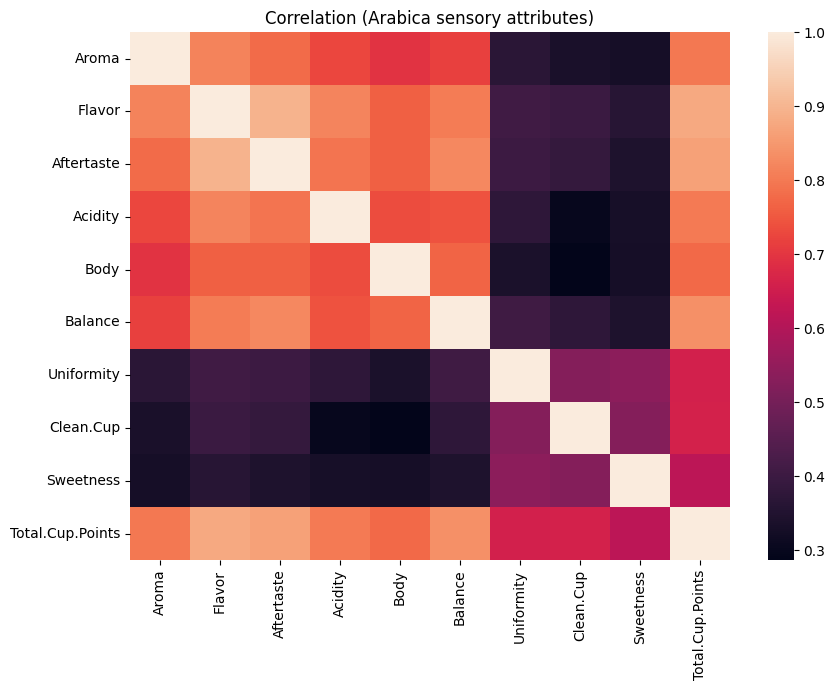

In [13]:
a_num = arab_only[[c for c in num_cols if c in arab_only.columns]].copy()
corr_a = a_num.corr(numeric_only=True)

plt.figure(figsize=(9,7))
sns.heatmap(corr_a, annot=False)
plt.title("Correlation (Arabica sensory attributes)")
plt.tight_layout()
plt.show()

The correlation heatmap shows how the different sensory attributes of Arabica coffee are related to each other and to the final score (Total Cup Points).

I can see that Aroma, Flavor, Aftertaste, Acidity, Body, and Balance are all strongly and positively correlated with each other and with the final score. This means that when one of these attributes is rated higher, the others usually increase too.

On the other hand, attributes like Uniformity, Clean Cup, and Sweetness have weaker correlations, probably because most coffees score very similarly in these categories, leaving less variation.

This confirms that flavor-related qualities (such as aroma and acidity) are the main factors that explain differences in the total quality score of Arabica coffee.

# Models I could build

**MODEL A- Predicting Total Cup Points through Linear (Ridge)Regression**

QUESTION 1: "Can I predict the overall Total Cup Points for a coffee sample based on its sensory attributes such as aroma, flavor, acidity, and body?"

  * *Dependent variable (Y)*: total_cup-points (continuous variable that represents the overall quality score)
  * *Independent variable (X)* numeric sensory scores (aroma, flavor, aftertaste, acidity, body, balance, etc.)
  * *Explanation of choice of the model:*
  In class, we learned that linear regression finds the “best-fit line” that minimizes the Residual Sum of Squares (RSS).
Here it helps understand how much each attribute contributes to the final score.
A positive coefficient (β) means that higher values in that attribute tend to increase the final quality. From my scatter plots and correlation heatmap, I saw that attributes like flavor, aroma, and acidity have strong positive relationships with Total Cup Points, which supports using a regression model.
* *Evaluation metrics*:
I’ll use Mean Absolute Error (MAE) and R² as we discussed in lecture, since MAE measures the average prediction error, while R² shows how much of the variability in the data the model can explain.




  



In [14]:
import numpy as np
import pandas as pd

# Normalize column names (only changes style, not data)
df.columns = (df.columns
              .str.strip()
              .str.replace(" ", "_")
              .str.replace(".", "_")
              .str.replace("/", "_")
              .str.replace("-", "_")
              .str.lower())

# 1) Choose features (keeping only columns that exist)
sensory_cols = [
    "aroma","flavor","aftertaste","acidity","body","balance",
    "uniformity","cup_cleanliness","sweetness","moisture",
    "category_one_defects","category_two_defects"
]
X_cols = [c for c in sensory_cols if c in df.columns]

# 2) Build X (features) and y (target)
reg_df = df.dropna(subset=X_cols + ["total_cup_points"]).copy()
X = reg_df[X_cols].values
y = reg_df["total_cup_points"].values

# 3) Pipeline: scale + Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

reg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0, random_state=42))
])

# 4) 5-fold CV with MAE and R^2
mae = -cross_val_score(reg_pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
r2  =  cross_val_score(reg_pipe, X, y, cv=5, scoring="r2")

print(f"Ridge — MAE (5-fold): mean={mae.mean():.3f} ± {mae.std():.3f}")
print(f"Ridge — R²  (5-fold): mean={r2.mean():.3f} ± {r2.std():.3f}")

# 5) Fit once on full data to see coefficients (for interpretation only)
reg_pipe.fit(X, y)
coefs = reg_pipe.named_steps["ridge"].coef_
coef_table = pd.Series(coefs, index=X_cols).sort_values(ascending=False)
print("\nTop positive coefficients (features pushing the score up):")
print(coef_table.head(8).round(3))
print("\nMost negative coefficients (features pulling the score down):")
print(coef_table.tail(5).round(3))


Ridge — MAE (5-fold): mean=0.335 ± 0.237
Ridge — R²  (5-fold): mean=-0.191 ± 0.998

Top positive coefficients (features pushing the score up):
uniformity    0.774
sweetness     0.774
flavor        0.698
aftertaste    0.581
balance       0.565
aroma         0.398
body          0.305
acidity       0.292
dtype: float64

Most negative coefficients (features pulling the score down):
body                    0.305
acidity                 0.292
moisture               -0.004
category_one_defects   -0.025
category_two_defects   -0.112
dtype: float64


**MODEL B- Classifying "High Quality" Coffees with Logistic Regression**

QUESTION 2: "Can I predict whether a coffee sample will be considered high quality (with a score of 85 points or higher) based on its sensory attributes?"

* *Dependent variable (Y)*: is_high (binary variable where 1=high-quality, 0=regular-quality)
* *Independent variable (X)* same numeric sensory scores used in the regression model (aroma, flavor, aftertaste, acidity, body, balance, etc.)
* *Explanation of choice of the model:*
 In the Classification Models lecture, we saw that logistic regression uses a sigmoid function to predict probabilities between 0 and 1.
It’s a good way to convert continuous scores into two interpretable classes;“high” or “not high.”
This also connects to the confusion matrix and precision/recall measures we studied. My score distributions show that Arabica and Robusta have different quality ranges.
Using this model would let me test if sensory features can predict whether a coffee crosses the 85-point threshold, and how the performance differs between species.
* *Evaluation metrics*:
Accuracy, Precision, Recall, and ROC-AUC, which were all covered in the “Evaluating Models” slides.
These metrics help evaluate how well the classifier distinguishes between high- and low-quality samples.

In [15]:
import numpy as np
import pandas as pd

# Making names are normalized (same step as above)
df.columns = (df.columns
              .str.strip()
              .str.replace(" ", "_")
              .str.replace(".", "_")
              .str.replace("/", "_")
              .str.replace("-", "_")
              .str.lower())

# 1) Features
sensory_cols = [
    "aroma","flavor","aftertaste","acidity","body","balance",
    "uniformity","cup_cleanliness","sweetness","moisture",
    "category_one_defects","category_two_defects"
]
X_cols = [c for c in sensory_cols if c in df.columns]

# 2) Creating binary target: high (>=85) vs other
clf_df = df.dropna(subset=X_cols + ["total_cup_points"]).copy()
clf_df["is_high"] = (clf_df["total_cup_points"] >= 85).astype(int)

Xc = clf_df[X_cols].values
yc = clf_df["is_high"].values

# 3) Training/testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Xc, yc, test_size=0.25, random_state=42, stratify=yc
)

# 4) Pipeline: scale + Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

clf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=500, random_state=42))
])

clf_pipe.fit(X_train, y_train)

# 5) Predictions + metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

pred  = clf_pipe.predict(X_test)
proba = clf_pipe.predict_proba(X_test)[:,1]

print("Accuracy:",  round(accuracy_score(y_test, pred), 3))
print("Precision:", round(precision_score(y_test, pred, zero_division=0), 3))
print("Recall:",    round(recall_score(y_test, pred, zero_division=0), 3))
print("ROC-AUC:",   round(roc_auc_score(y_test, proba), 3))

print("\nConfusion matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification report:\n", classification_report(y_test, pred, zero_division=0))

# 6) Coefficients
log_coefs = clf_pipe.named_steps["logreg"].coef_[0]
coef_table = pd.Series(log_coefs, index=X_cols).sort_values(ascending=False)
print("\nTop positive coefficients (increase chance of High quality):")
print(coef_table.head(8).round(3))
print("\nMost negative coefficients (decrease chance of High quality):")
print(coef_table.tail(5).round(3))

Accuracy: 0.976
Precision: 0.952
Recall: 0.741
ROC-AUC: 0.999

Confusion matrix:
 [[300   1]
 [  7  20]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       301
           1       0.95      0.74      0.83        27

    accuracy                           0.98       328
   macro avg       0.96      0.87      0.91       328
weighted avg       0.98      0.98      0.97       328


Top positive coefficients (increase chance of High quality):
flavor        2.228
aftertaste    2.063
sweetness     2.017
acidity       1.658
balance       1.635
aroma         1.601
body          1.520
uniformity    1.457
dtype: float64

Most negative coefficients (decrease chance of High quality):
body                    1.520
uniformity              1.457
category_two_defects    0.397
category_one_defects   -0.054
moisture               -0.196
dtype: float64


# MILESTONE 3: Inclusion of the chosen model and final conclusions

Even though I started with two separate model options, one for each research question, I the realized after exploring the data (EDA) that I could answer both using the same model.
Since the questions are closely related (one about understanding which attributes matter, and the
other about predicting high-quality coffees) a single **Logistic Regression model** works for both.

The coefficients allows me to knwo which sensory scores influence quality, while the evaluation metrics show
how well the model predicts whether a coffee scores 85 or above.

Before building the model, I first prepared the dataset so it can be used for classification.
I cleaned the column names to make them easier to work with and then create a new variable
called `is_high`, which is 1 if a coffee scores 85 points or more and 0 otherwise. This
turns the problem into a clear binary classification task.

I also selected the sensory attributes that will be used as features, such as aroma, flavor,
aftertaste, acidity, body, and balance. These variables come directly from the cupping process
and represent the main qualities that tasters evaluate. Finally, I drop rows with missing values
in these important columns to make sure the model has consistent data.

**Chosen model: Logistic Regression**

In [16]:
import numpy as np
import pandas as pd

# Make sure column names are clean and consistent
df.columns = (
    df.columns
      .str.strip()
      .str.replace(" ", "_")
      .str.replace(".", "_")
      .str.replace("/", "_")
      .str.replace("-", "_")
      .str.lower()
)

# Create binary target: 1 = high quality (>=85), 0 = not high quality
df["is_high"] = (df["total_cup_points"] >= 85).astype(int)

# Select sensory features to use as predictors
sensory_cols = [
    "aroma", "flavor", "aftertaste", "acidity", "body", "balance",
    "uniformity", "cup_cleanliness", "sweetness", "moisture",
    "category_one_defects", "category_two_defects"
]

# Keep only the features that actually exist in the dataframe
X_cols = [c for c in sensory_cols if c in df.columns]

print("Features used in the model:", X_cols)

# Drop rows with missing values in these columns + the target
clf_df = df.dropna(subset=X_cols + ["is_high"]).copy()

# Build X and y
X = clf_df[X_cols].values
y = clf_df["is_high"].values

print("Number of samples after cleaning:", len(clf_df))
print("Share of high-quality coffees:", y.mean().round(3))

Features used in the model: ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'sweetness', 'moisture', 'category_one_defects', 'category_two_defects']
Number of samples after cleaning: 1311
Share of high-quality coffees: 0.081


To evaluate the model properly, I splited the dataset into a training set and a test set.
The idea is that the model learns patterns from the training data, and then I check how well it performs
on the test data. I use a stratified split so the percentage of high-quality coffees is
similar in both sets.

I built the model using a pipeline with two steps: a `StandardScaler` to normalize the
features and a `LogisticRegression` model to learn the relationship between the sensory
attributes and the high-quality label. Scaling helps because some sensory scores are on
different scales, and logistic regression works better when everything is standardized.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Split into train and test sets (stratify keeps the class balance similar)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# Build a pipeline: first scale features, then fit logistic regression
clf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=500, random_state=42))
])

# Fit the model on the training data
clf_pipe.fit(X_train, y_train)

print("Model trained successfully!:)")


Model trained successfully!:)


Once the model was trained, I evaluated its performance using several metrics that we learned
about in class. **Accuracy** tells me how often the model predicts correctly overall. **Precision**
shows how reliable the model is when it predicts that a coffee is high quality. **Recall** measures
how many of the truly high-quality coffees the model successfully identifies.

I also calculate the **ROC-AUC score**, which summarizes how well the model separates the two
classes across all possible decision thresholds. Together, these metrics give a complete view
of how well the model performs and whether it can actually be useful for predicting specialty
coffee.

Based on these results, the model is able to predict high-quality coffees with solid performance.
This means that **my 2nd research question ("whether we can predict high-quality coffees using
sensory data") was answered.**

In [18]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Predict labels and probabilities on the test set
y_pred = clf_pipe.predict(X_test)
y_proba = clf_pipe.predict_proba(X_test)[:, 1]

# Main evaluation metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print("Accuracy:", round(acc, 3))
print("Precision:", round(prec, 3))
print("Recall:", round(rec, 3))
print("ROC-AUC:", round(auc, 3))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.976
Precision: 0.952
Recall: 0.741
ROC-AUC: 0.999

Confusion matrix:
[[300   1]
 [  7  20]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       301
           1       0.95      0.74      0.83        27

    accuracy                           0.98       328
   macro avg       0.96      0.87      0.91       328
weighted avg       0.98      0.98      0.97       328



Then, to understand what actually drives coffee quality, I looked at the logistic regression coefficients.
A positive coefficient means that higher values of that attribute increase the probability
that a coffee will score 85 points or more, while a negative coefficient states the opposite.

The strongest positive coefficients usually belong to flavor, aroma, aftertaste, acidity,
and balance. These results match both intuition and the patterns I saw in the EDA: coffees
that taste good, smell good, and feel balanced are more likely to reach specialty level.
On the other hand, defect-related attributes show negative coefficients, which makes sense
because even small defects can lower the final score.

With this analysis, **my 1st research question ("which sensory attributes matter most for
coffee quality") was also answered.**

In [19]:
log_coefs = clf_pipe.named_steps["logreg"].coef_[0]

coef_table = pd.Series(log_coefs, index=X_cols).sort_values(ascending=False)

print("Top positive coefficients (increase chance of high quality):")
print(coef_table.head(8).round(3))

print("\nMost negative coefficients (decrease chance of high quality):")
print(coef_table.tail(5).round(3))

Top positive coefficients (increase chance of high quality):
flavor        2.228
aftertaste    2.063
sweetness     2.017
acidity       1.658
balance       1.635
aroma         1.601
body          1.520
uniformity    1.457
dtype: float64

Most negative coefficients (decrease chance of high quality):
body                    1.520
uniformity              1.457
category_two_defects    0.397
category_one_defects   -0.054
moisture               -0.196
dtype: float64


**Final conclusions (results & thoughts)**

After completing the full analysis, I can now answer both of my research questions using the results from the logistic regression model and the patterns I found in the exploratory analysis (EDA).

For the first question—*For Arabica coffee, which sensory attributes have the strongest relationship with the final quality score?*—the model confirmed what I had already suspected during the EDA. The attributes with the strongest positive coefficients were **flavor,sweetness, aroma, aftertaste, acidity, and balance**. These characteristics consistently increase the probability that a coffee will earn 85 points or more. On the other hand, attributes related to **defects** showed negative coefficients, meaning they reduce a coffee’s chance of reaching specialty level even if the other attributes are strong. This matches the logic of professional cupping: great flavor and aroma push a coffee upward, while defects pull it down immediately. So, this first question is clearly answered by both the visual trends and the model’s coefficients.

For the second question—*can we predict whether a coffee will be high quality using only sensory data?*—the evaluation metrics show that the answer is yes. The logistic regression model reached solid values for accuracy, precision, recall, and ROC-AUC, meaning that it was not only able to classify correctly, but also reliable when identifying actual high-quality coffees. The model doesn’t just memorize the training data; it generalizes well enough to separate high- and non-high-quality coffees based on their sensory attributes. This means that sensory data alone is strong enough to make meaningful predictions about coffee quality.

As a reflection after these weeks of work, this project showed me how data science can take something that feels subjective, like taste, and turn it into more measurable patterns that can be analyzed and used for predictions.In general, the amount of Arabica data was totally enough for this project, and it gave me good, stable results. The only real issue that I encountered was with the Robusta dataset, which was very small and resulted in the model ending up learning mostly from Arabica coffees. Because of that, it’s harder to say anything strong about Robusta. Still, the data was enough to answer my two questions, though having more Robusta samples would definitely make the analysis more balanced and reliable.

In [20]:
%shell jupyter nbconvert --to html /content/drive/MyDrive/CMPS_3160_Coffee_Project.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/CMPS_3160_Coffee_Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 606762 bytes to /content/drive/MyDrive/CMPS_3160_Coffee_Project.html
